In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 读取你导出的 CSV 文件
df = pd.read_csv('customer_features.csv')  # ← 换成你的文件路径
df.head()


,customer_name,frequency,monetary,avg_order_amount,product_variety,first_order_date,last_order_date,recency_days,days_as_customer
0,Webgility Shop KEVIDKO,6533,1112089.34,170.23,140,7/1/2022,7/9/2025,8,1112
1,Bostons Best Coffee,116,350266.66,3019.54,10,5/18/2023,5/28/2025,50,791
2,Finest City Paper,1635,293978.16,179.80,73,7/8/2022,7/11/2025,6,1105
3,Legacy Wholesale Group,166,269452.75,1623.21,20,8/10/2022,6/26/2025,21,1072
4,MDD Supply,119,230183.40,1934.31,36,10/3/2022,6/26/2025,21,1018


In [3]:
features = ['recency_days', 'frequency', 'monetary',
            'avg_order_amount', 'product_variety', 'days_as_customer']

X = df[features].copy()

# 检查缺失值
print(X.isnull().sum())


recency_days        0
frequency           0
monetary            0
avg_order_amount    0
product_variety     0
days_as_customer    0
dtype: int64


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



C:\Users\yihen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yihen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yihen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\yihen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

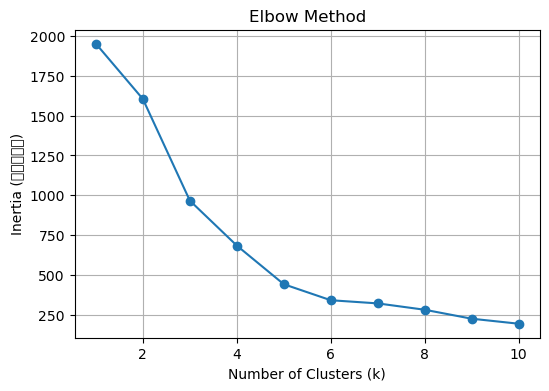

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 存放每个聚类数下的 inertia（误差平方和）
inertia = []

# 尝试的聚类数范围，从 1 到 10
K_range = range(1, 11)

# 对每个 k 运行 KMeans，并记录 inertia（误差平方和）
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)  # 注意：X_scaled 是你标准化后的特征矩阵
    inertia.append(km.inertia_)

# 绘制肘部图（Elbow Method）
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')  # 每个点是一个 k 值的 inertia
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (误差平方和)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state =42)
df["cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\yihen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


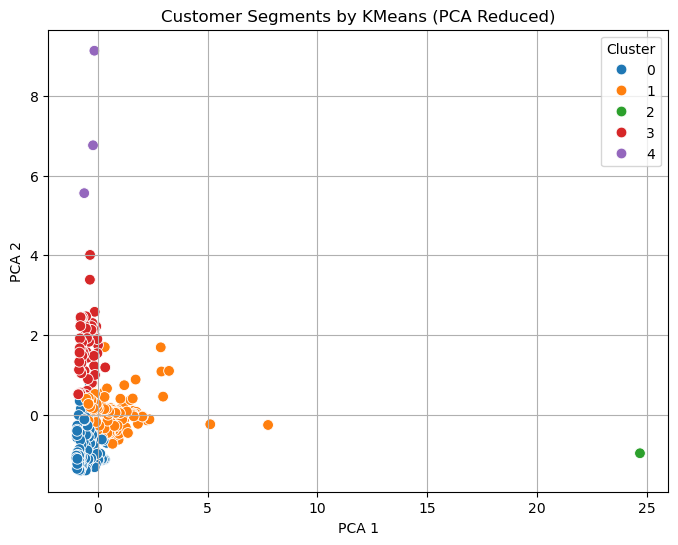

In [18]:
pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='tab10', s=60)
plt.title('Customer Segments by KMeans (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
cluster_map = {0: 'Standard', 1: 'High Value', 2: 'VIP', 3: 'Potential', 4: 'Newcomer'}
df['segment'] = df['cluster'].map(cluster_map)

In [19]:
df.groupby('cluster')[['recency_days', 'frequency', 'monetary',
                       'avg_order_amount', 'product_variety', 'days_as_customer']].mean().round(2)


,recency_days,frequency,monetary,avg_order_amount,product_variety,days_as_customer
cluster,,,,,,
0,65.83,32.72,2888.41,99.96,6.49,304.00
1,57.82,175.47,24214.61,154.45,17.32,970.96
2,8.00,6533.00,1112089.34,170.23,140.00,1112.00
3,748.04,14.68,2570.77,204.37,5.33,920.82
4,999.33,3.00,26445.83,7939.58,1.67,1046.00
